In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
accuracy_matrix = pd.read_csv('accuracy_across_iterations.csv', header=None, index_col=0, delimiter=';')
accuracy_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi_CV,0.899206,0.935450,0.892328,0.920899,0.934392,0.942063,0.920635,0.913492,0.942063,0.899735,0.934921,0.942328,0.964286,0.949735,0.928571,0.942593,0.928042,0.906614,0.934921,0.934921
RF_SG_msi_test,0.942857,0.885714,0.942857,0.885714,0.885714,0.914286,0.914286,0.942857,0.885714,0.942857,0.828571,0.885714,0.914286,0.885714,0.885714,0.971429,0.971429,0.914286,0.857143,0.857143
XGB_SG_msi_CV,0.863492,0.885185,0.892328,0.899735,0.898677,0.884392,0.906085,0.898942,0.935714,0.877513,0.856614,0.913492,0.921164,0.892328,0.913757,0.914021,0.870899,0.885185,0.905820,0.899206
XGB_SG_msi_test,0.971429,0.857143,0.914286,0.942857,0.828571,0.914286,0.857143,0.828571,0.857143,0.885714,0.828571,0.885714,0.914286,0.828571,0.857143,0.914286,0.885714,0.971429,0.914286,0.800000
RF_SGGE_msi_CV,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992857,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992857,1.000000,1.000000,1.000000,1.000000
RF_SGGE_msi_test,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGB_SGGE_msi_CV,0.978307,0.985714,1.000000,0.992857,0.985714,0.978571,0.992857,0.985714,0.978571,0.978571,0.978571,0.992857,0.985714,0.992593,0.978571,0.964286,0.964286,0.978571,0.992593,0.985714
XGB_SGGE_msi_test,1.000000,0.971429,0.971429,1.000000,0.942857,1.000000,1.000000,1.000000,0.914286,1.000000,0.971429,0.971429,0.942857,1.000000,1.000000,1.000000,1.000000,0.971429,1.000000,1.000000
RF_SG_stage_CV,0.699567,0.645887,0.748485,0.700433,0.710390,0.654113,0.758442,0.682684,0.654113,0.681385,0.736797,0.707792,0.700866,0.729870,0.632900,0.729004,0.719048,0.710390,0.719481,0.709091


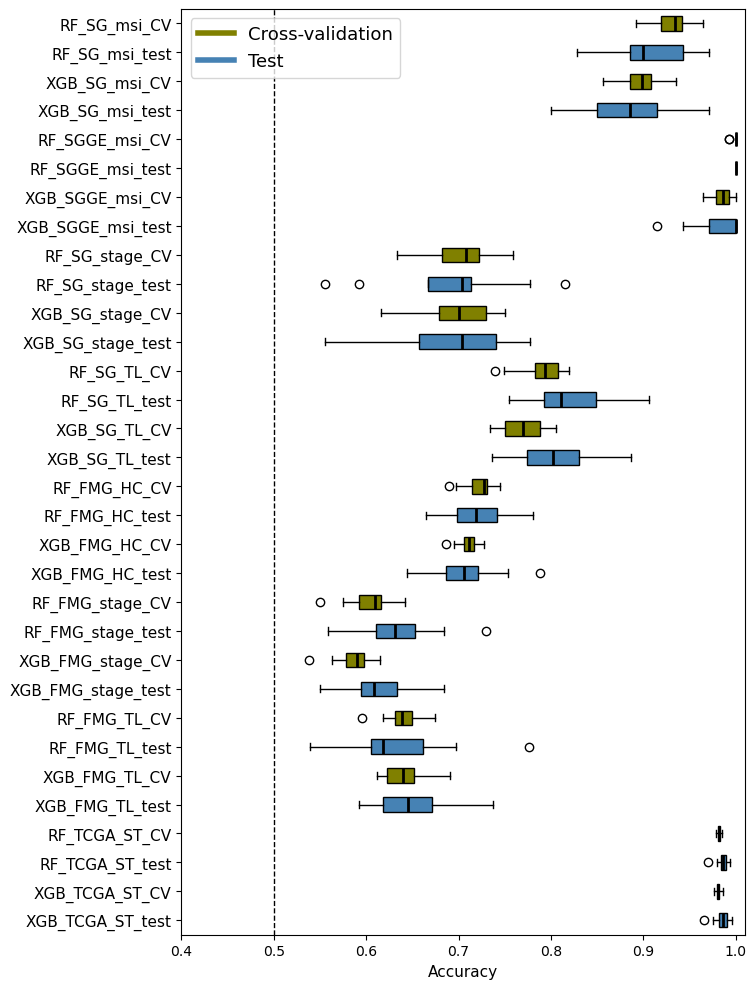

In [82]:

df = accuracy_matrix.transpose()

# Define colors for the groups
train_color = 'olive'  # Changed to red
test_color = 'steelblue'
median_color = 'black'
median_linewidth = 2
label_fontsize = 11
legend_fontsize = 13

# Plotting
fig, ax = plt.subplots(figsize=(9, 10))  # Adjust size as necessary

# Create boxplot
bp = ax.boxplot(df.values, vert=False, patch_artist=True)

# Color the boxplots
for i, (patch, median) in enumerate(zip(bp['boxes'], bp['medians'])):
    label = accuracy_matrix.index[i]
    if 'test' in label.lower():
        patch.set_facecolor(test_color)
    else:
        patch.set_facecolor(train_color)
    # Change the color and line width of the median line
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)

# Add vertical dashed line at x=0.5
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)

# Customize labels and title
ax.set_yticklabels(accuracy_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('Accuracy', fontsize=label_fontsize)
ax.invert_yaxis()

# Add legend outside the plot on the right side
handles = [plt.Line2D([0], [0], color=train_color, lw=4),
           plt.Line2D([0], [0], color=test_color, lw=4)]
labels = ['Cross-validation', 'Test']
#ax.legend(handles, labels, fontsize=label_fontsize)#, loc='upper left')
legend = ax.legend(handles, labels, loc='upper left',fontsize=legend_fontsize)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()

In [83]:
auroc_matrix = pd.read_csv('auroc_across_iterations.csv', header=None, index_col=0, delimiter=';')
auroc_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi,0.993464,0.959150,1.000000,0.973856,0.968954,0.977124,0.954248,0.980392,0.849673,0.996732,0.944444,0.913399,0.887255,0.931373,0.990196,0.996732,0.970588,0.970588,0.964052,0.965686
XGB_SG_msi,0.990196,0.924837,1.000000,0.977124,0.937908,0.980392,0.921569,0.947712,0.888889,0.973856,0.977124,0.921569,0.901961,0.905229,0.944444,0.944444,0.977124,0.993464,0.970588,0.947712
RF_SGGE_msi,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGB_SGGE_msi,1.000000,1.000000,1.000000,1.000000,0.996732,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RF_SG_stage,0.796703,0.802198,0.648352,0.799451,0.917582,0.840659,0.714286,0.826923,0.782967,0.733516,0.760989,0.785714,0.788462,0.829670,0.835165,0.681319,0.796703,0.785714,0.755495,0.785714
XGB_SG_stage,0.791209,0.780220,0.708791,0.730769,0.796703,0.835165,0.620879,0.796703,0.763736,0.774725,0.604396,0.670330,0.725275,0.824176,0.807692,0.637363,0.730769,0.813187,0.785714,0.741758
RF_SG_TL,0.966839,0.976126,0.947308,0.968472,0.962327,0.967701,0.933617,0.980100,0.962554,0.969116,0.965236,0.961585,0.971751,0.973418,0.963924,0.981561,0.991906,0.961793,0.982985,0.958946
XGB_SG_TL,0.964181,0.973881,0.956648,0.970852,0.944499,0.958193,0.936090,0.975667,0.975276,0.975659,0.975989,0.973112,0.973000,0.967854,0.961265,0.963402,0.985031,0.970571,0.967350,0.941010
RF_FMG_HC,0.787671,0.783449,0.768625,0.808782,0.760462,0.785044,0.795459,0.761963,0.792644,0.791049,0.802308,0.785889,0.855601,0.792456,0.754551,0.765716,0.771908,0.763558,0.761400,0.800901


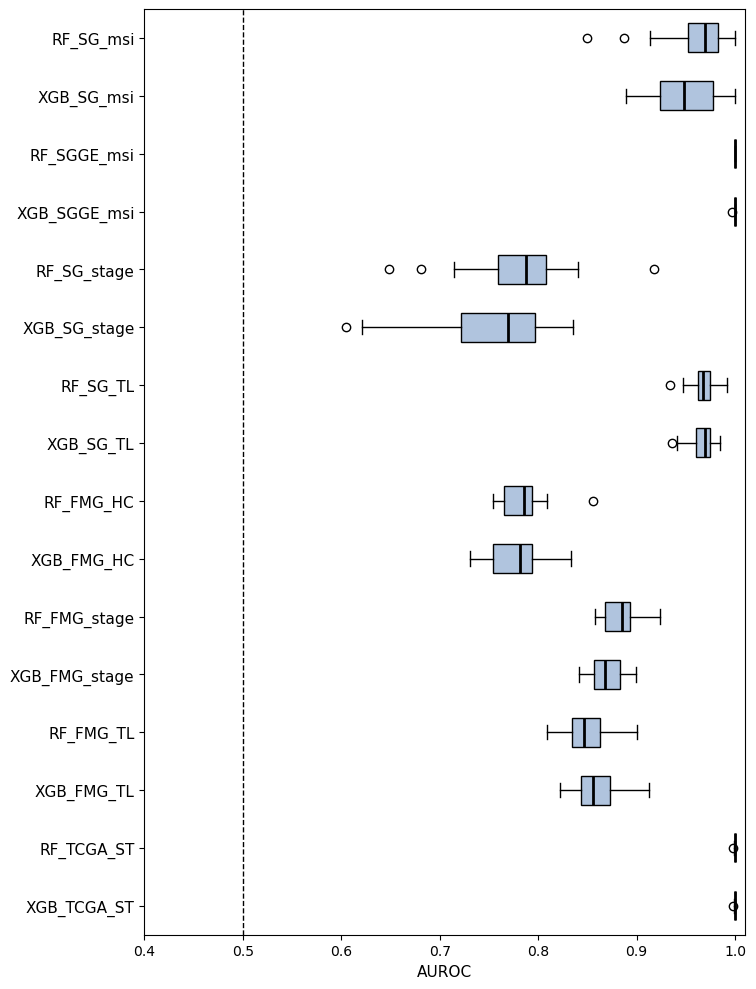

In [84]:
df1 = auroc_matrix.transpose()

# Define colors for the groups
box_color = 'lightsteelblue'
median_color = 'black'
median_linewidth = 2
label_fontsize = 11
legend_fontsize = 13

# Plotting
fig, ax = plt.subplots(figsize=(9, 10))  # Adjust size as necessary

# Create boxplot
bp = ax.boxplot(df1.values, vert=False, patch_artist=True)

# Change the color of the boxes
for box in bp['boxes']:
    box.set_facecolor(box_color)

# Change the color and linewidth of the median lines
for median in bp['medians']:
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)

# Add vertical dashed line at x=0.5
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
# Customize labels and title
ax.set_yticklabels(auroc_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('AUROC', fontsize=label_fontsize)
ax.invert_yaxis()

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()